<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/RICE_QUALITY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_classificaton(ratio):
	ratio =round(ratio,1)
	toret=""
	if(ratio>=3):
		toret="Slender"
	elif(ratio>=2.1 and ratio<3):
		toret="Medium"
	elif(ratio>=1.1 and ratio<2.1):
		toret="Bold"
	elif(ratio<=1):
		toret="Round"
	toret="("+toret+")"
	return toret

In [3]:
print ("START")
img = cv2.imread('rice.png',0)

START


In [4]:
#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

In [5]:
#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 -depth of  destination image

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

In [6]:
#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)
#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

In [7]:
#edge detection
edges = cv2.Canny(dilation,100,200)

In [8]:
### Size detection
contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("NUMBER OF RICE GRAINS :=",len(contours))
total_ar=0
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	aspect_ratio = float(w)/h
	if(aspect_ratio<1):
		aspect_ratio=1/aspect_ratio
	print (round(aspect_ratio,2),get_classificaton(aspect_ratio))
	total_ar+=aspect_ratio
avg_ar=total_ar/len(contours)
print ("AVG ASPECT RATIO:=",round(avg_ar,2),get_classificaton(avg_ar))

NUMBER OF RICE GRAINS := 30
3.17 (Slender)
1.73 (Bold)
2.38 (Medium)
1.07 (Bold)
1.14 (Bold)
2.11 (Medium)
4.0 (Slender)
1.55 (Bold)
2.11 (Medium)
3.5 (Slender)
2.22 (Medium)
2.75 (Medium)
1.14 (Bold)
3.0 (Slender)
2.2 (Medium)
1.91 (Bold)
2.86 (Medium)
1.12 (Bold)
2.86 (Medium)
3.0 (Slender)
1.33 (Bold)
2.11 (Medium)
2.33 (Medium)
3.0 (Slender)
2.38 (Medium)
1.67 (Bold)
1.73 (Bold)
2.62 (Medium)
2.86 (Medium)
3.14 (Slender)
AVG ASPECT RATIO:= 2.3 (Medium)


Text(0.5, 1.0, 'ORIGINAL IMAGE IS GIVEN ')

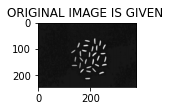

In [12]:
imgs_row=2
imgs_col= 3
plt.subplot(imgs_row,imgs_col,1),plt.imshow(img,'gray')
plt.title("ORIGINAL IMAGE IS GIVEN ")

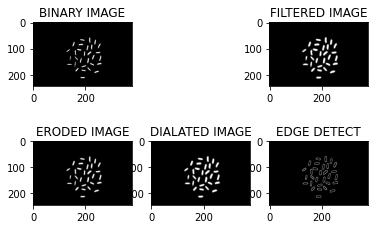

In [13]:

plt.subplot(imgs_row,imgs_col,1),plt.imshow(binary,'gray')
plt.title("BINARY IMAGE")

plt.subplot(imgs_row,imgs_col,3),plt.imshow(dst,'gray')
plt.title("FILTERED IMAGE")

plt.subplot(imgs_row,imgs_col,4),plt.imshow(erosion,'gray')
plt.title("ERODED IMAGE")

plt.subplot(imgs_row,imgs_col,5),plt.imshow(dilation,'gray')
plt.title("DIALATED IMAGE")

plt.subplot(imgs_row,imgs_col,6),plt.imshow(edges,'gray')
plt.title("EDGE DETECT")

plt.show()